In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.linalg as lg
from scipy.optimize import curve_fit

In [2]:
dt = 0.0001
t = 4.0000
step = int(t/dt)
fns = 100
hbar = 1 
gamma = 2
w_t = 1.0 * 2 * np.pi
nth = 0.63
tlist = np.arange(0,4.0001,dt)
print(tlist.shape)
print(step)

(40001,)
40000


In [3]:
def a(n):
    '''
        returns the annihilation operator for maximum n photons
    '''
    a = np.zeros((n+1,n+1))
    b = np.arange(1,n+1)
    np.fill_diagonal(a[:,1:],np.sqrt(b))
    return a

def adagger(n):
    '''
        returns the creation operator for maximum n photons
    '''
    return a(n).conj().T



In [39]:
c_1 = np.sqrt(gamma * (1 + nth)) * a(1)
c_2 = np.sqrt(gamma * nth) * adagger(1)

# creating time evolution operator when no jump happens 


H = w_t * np.dot(adagger(1),a(1))

H_eff = H - ((1j)*hbar*gamma)/2 * np.dot(adagger(1),a(1)) 
#H_eff = H - ((1j)*hbar)/2 * (np.dot(c_1.conj().T,c_1)+ np.dot(c_2.conj().T,c_2))
U = np.eye(2) - ((1j)*dt)/hbar * H_eff
print(H)
print("H_eff =",H_eff)
print(U)

# L operator

L = np.sqrt(gamma) * a(1)
print(L)

U2 = np.array([[1- gamma*dt, -3*1j * gamma*dt ],[-3*1j*gamma*dt, 1]],dtype = complex)
L2 = np.array([[0,0],[2*np.sqrt(gamma),0]],dtype = complex)
print("U2 =", U2)

[[0.         0.        ]
 [0.         6.28318531]]
H_eff = [[0.        +0.j 0.        +0.j]
 [0.        +0.j 6.28318531-1.j]]
[[1.    +0.j         0.    +0.j        ]
 [0.    +0.j         0.9999-0.00062832j]]
[[0.         1.41421356]
 [0.         0.        ]]
U2 = [[0.9998+0.j     0.    -0.0006j]
 [0.    -0.0006j 1.    +0.j    ]]


In [10]:
# initialising the wave function 
psi_0 = np.array([[0],[1]])

#dp = gamma*dt* psi_0[1,0]**2

#print(np.dot(L,psi_0)/np.sqrt(dp/dt))

# initial evolution 

#psi_f = np.zeros((2,1))
print(psi_0)
#psi_f = np.dot(U,psi_0)
#print(psi_f)
#k = lg.norm(psi_f)
#print(k)


[[0]
 [1]]


In [41]:
#H = np.array([[-1*1j*hbar*gamma*(1/2), -3*hbar*gamma],[ -3*hbar*gamma, 0]])
print(H)
#k = (1/hbar) * H
#U = np.eye(2) - 1j * (1/hbar)* dt * H
U_dagger = U.conj().T




[[0.         0.        ]
 [0.         6.28318531]]


(200, 40001)


/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


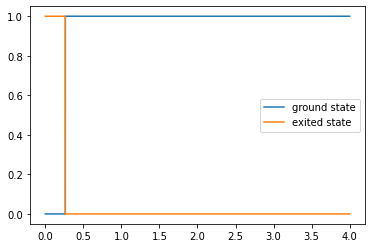

In [42]:
def QMCWF(U,L,psi_0,step):
    
    psi_f = psi_0
    psi_n = psi_0
    prob_g = np.zeros(step+1)
    prob_e = np.zeros(step+1)
    prob_g[0] = abs(psi_0[0,0])**2
    prob_e[0] = abs(psi_0[1,0])**2
    
    for t in range(step):
        size = np.dot(np.dot(psi_0.conj().T,U_dagger),np.dot(U,psi_0))
        no_jump_prob = float(size[0,0])
        epsilon = random.rand()
        if epsilon < no_jump_prob :
            psi_f = np.dot(U,psi_0)
            psi_n = psi_f/np.sqrt(1-dp)
            prob_g[t+1] = abs(psi_n[0,0])**2
            
            prob_e[t+1] = abs(psi_n[1,0])**2
            psi_0 = psi_n
        else :
            psi_n = np.dot(L,psi_0)/np.sqrt(dp/dt)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            prob_g[t+2:step+2] = 1
            break
    print(prob_g.shape)
    return psi_n,prob_g,prob_e

def QMCWF2(U,L,psi_0i,step):
    
    psi_f = psi_0i
    psi_n = psi_0i
    prob_g = np.zeros(step+1)
    prob_e = np.zeros(step+1)
    prob_g[0] = abs(psi_0i[0,0])**2
    prob_e[0] = abs(psi_0i[1,0])**2
    for t in range(step):
        size = np.dot(np.dot(psi_0i.conj().T,U_dagger),np.dot(U,psi_0i))
        jump_prob = 1.0 - float(size[0,0])
        #print(size)
        epsilon = random.rand()
        if epsilon > jump_prob:
            psi_f = np.dot(U,psi_0i)
            psi_n = psi_f/lg.norm(psi_f)
            #print(psi_n)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            psi_0i = psi_n
        else :
            psi_f = np.dot(L,psi_0i)
            psi_n = psi_f/lg.norm(psi_f)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            prob_g[t+2:step+2] = 1
            break
    return prob_g,prob_e
print(np.zeros((200,step+1)).shape)  
ground_prob,exited_prob = QMCWF2(U,L,psi_0,step)
plt.plot(tlist,ground_prob,label = "ground state")
plt.plot(tlist,exited_prob, label = "exited state")
plt.legend()

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


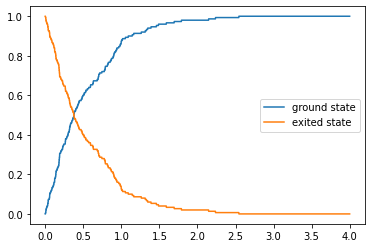

In [43]:
# number of iterations
N_iter = 150

ground_prob = np.zeros((N_iter,step+1))
exited_prob = np.zeros((N_iter,step+1))
for i in range(N_iter):
    ground_prob[i,:],exited_prob[i,:] = QMCWF2(U,L,psi_0,step)

ground_avg = np.zeros(step+1)
exited_avg = np.zeros(step+1)

print( ground_prob[:,1])
print(exited_prob[:,1])
for i in range(step+1):
    ground_avg[i] = np.sum(ground_prob[:,i])/N_iter
    exited_avg[i] = np.sum(exited_prob[:,i])/N_iter
    

plt.plot(tlist,ground_avg,label = "ground state")
plt.plot(tlist,exited_avg, label = "exited state")
plt.legend()


(40001,)
(40001,)
[ 1.03092548 -1.90173408]
comparing the gamma = 1 theoretical value with the simulation =  1.9017340839778123


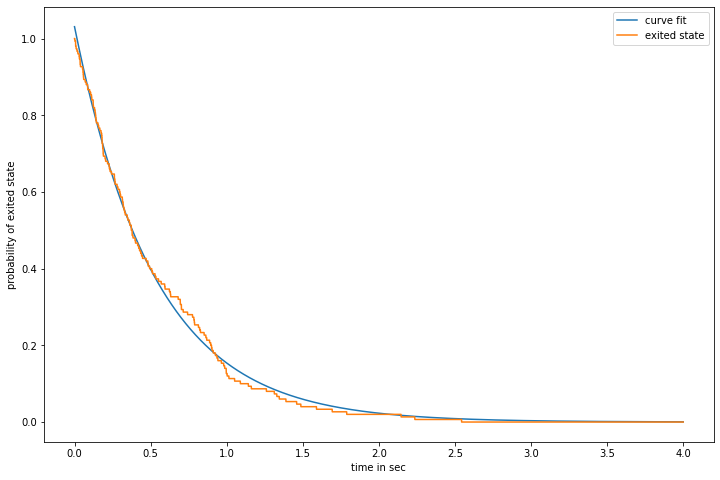

In [44]:
print(tlist.shape)
print(exited_avg.shape)
def test(x, a, b):
    return a*np.exp(b*x)
 
param, param_cov = curve_fit(test, tlist, exited_avg)
print(param)
fig = plt.figure(figsize=(12, 8))
plt.plot(tlist,param[0]*np.exp(param[1]*tlist), label = "curve fit")
plt.plot(tlist,exited_avg, label = "exited state")
plt.xlabel("time in sec")
plt.ylabel("probability of exited state")
plt.legend()
print("comparing the gamma = 1 theoretical value with the simulation = ",-param[1])

### it could have been more accurate with bigger steps. 

In [31]:
# now for the more general part of quantum monte carlo 
psi_0 = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
gamma = 1
hbar = 1
nth = 0.063
c_1 = np.sqrt(gamma * (1 + nth)) * a(1)
c_2 = np.sqrt(gamma * nth) * adagger(1)
c_3 = np.array([c_1,c_2])
dt = 0.0001
t = 4.0000
step = int(t/dt)
tlist = np.arange(0,4.0001,dt)
w_t = 1.0 * 2 * np.pi
H = w_t * np.dot(adagger(1),a(1))
H_eff = H - ((1j)*hbar)/2 * (np.dot(c_1.conj().T,c_1)+ np.dot(c_2.conj().T,c_2))
U = np.eye(2) - ((1j)*dt)/hbar * H_eff
U_dagger = U.conj().T

print(tlist.shape)

print(step)
print(c_3.shape)
print(psi_0)

(40001,)
40000
(2, 2, 2)
[[0.70710678]
 [0.70710678]]


In [33]:
def QMCWF3(U,L,psi_0i,step):
    
    psi_f = psi_0i
    psi_n = psi_0i
    prob_g = np.zeros(step+1)
    prob_e = np.zeros(step+1)
    prob_g[0] = abs(psi_0i[0,0])**2
    prob_e[0] = abs(psi_0i[1,0])**2
    for t in range(step):
        size = np.dot(np.dot(psi_0i.conj().T,U_dagger),np.dot(U,psi_0i))
        jump_prob = 1.0 - float(size[0,0])
        #print(jump_prob)
        
        epsilon = random.rand()
        if epsilon > jump_prob:
            psi_f = np.dot(U,psi_0i)
            psi_n = psi_f/(lg.norm(psi_f))
            #print(abs(psi_n[1,0])**2)
            prob_g[t+1] = abs(psi_n[0,0])**2
            prob_e[t+1] = abs(psi_n[1,0])**2
            psi_0i = psi_n
        else :
            cum_pro = 0
            dpm = 0
            count = 0
            for K in range(2):
                psi_f = np.dot(L[K,:,:],psi_0i)
                dpm = dt* np.abs(np.dot(psi_f.conj().T,psi_f ))
                print(dt* np.abs(np.dot(psi_f.conj().T,psi_f)))
                cum_pro += dpm
                count += 1
                if epsilon < cum_pro:
                    psi_f /= np.sqrt(dpm / dt)
                    psi_n = psi_f
                    prob_g[t+1] = abs(psi_n[0,0])**2
                    prob_e[t+1] = abs(psi_n[1,0])**2
                    psi_0i = psi_n
                    break
            if count == 1:
               prob_g[t+2:step+2] = 1 
               
                     
    return prob_g,prob_e
            

In [ ]:
k_1 = np.dot(np.dot(psi_0i.conj().T,c_1.conj().T),np.dot(c_1,psi_0i))
            
            k_2 = np.dot(np.dot(psi_0i.conj().T,c_2.conj().T),np.dot(c_2,psi_0i))
            K_3 = dt*float(k_1[0,0]) + dt*float(k_2[0,0])
            print("k_1 = ",dt*float(k_1[0,0]))
            print("k_2 = ",dt*float(k_2[0,0]))
            C = np.random.choice([0,1], size = None, p = [dt*float(k_1[0,0])/K_3,dt*float(k_2[0,0])/K_3])
            if C == 0:
                psi_f = np.dot(c_1,psi_0i)
                psi_n = psi_f/lg.norm(psi_f)
                prob_g[t+1] = abs(psi_n[0,0])**2
                prob_e[t+1] = abs(psi_n[1,0])**2
                prob_g[t+2:step+2] = 1
                break
            else :
                psi_f = np.dot(c_2,psi_0i)
                psi_n = psi_f/lg.norm(psi_f)
                prob_g[t+1] = abs(psi_n[0,0])**2
                prob_e[t+1] = abs(psi_n[1,0])**2
                prob_g[t+2:step+2] = 1
                break
    return prob_g,prob_e

/home/pi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


[[5.19034529e-05]]
[[0.]]
[[6.3e-06]]
[[0.0001063]]
[0.5000249]
[0.4999751]


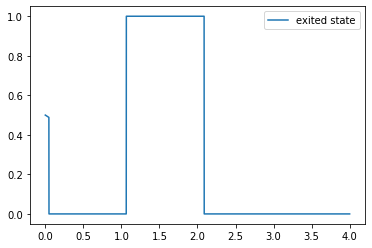

In [38]:
# number of iterations
N_iter = 1

ground_prob = np.zeros((N_iter,step+1))
exited_prob = np.zeros((N_iter,step+1))
for i in range(N_iter):
    ground_prob[i,:],exited_prob[i,:] = QMCWF3(U,c_3,psi_0,step)

ground_avg = np.zeros(step+1)
exited_avg = np.zeros(step+1)

print( ground_prob[:,1])
print(exited_prob[:,1])
for i in range(step+1):
    ground_avg[i] = np.sum(ground_prob[:,i])/N_iter
    exited_avg[i] = np.sum(exited_prob[:,i])/N_iter
    

#plt.plot(tlist,ground_avg,label = "ground state")
plt.plot(tlist,exited_avg, label = "exited state")
plt.legend()